## Getting a grip on minor allele frequenecs for multiallelic data

I want to better understand the distribution of frequencies of minor alleles.

Specific things to explore:
- average number of reads per locus in individual
- for loci with two or more alleles in an individual, frequency of minor alleles

In [1]:
cd /mnt/hgfs/SHARED_FOLDER/WorkingFolder/Stacks_2

/mnt/hgfs/SHARED_FOLDER/WorkingFolder/Stacks_2


In [2]:
ind_all = open("FG001.alleles.tsv", "r")
lines = ind_all.readlines()[1:] # get rid of header

biglist_for_array = []
for line in lines:
    linelist = line.strip().split()[2:] # exclude first two columns, not useful info
    biglist_for_array.append(linelist) # make list of lists for array

In [3]:
import numpy as np

In [4]:
r = np.array(biglist_for_array) # convert to array
print r[0:9,] # check

[['6' 'A' '30.00' '3']
 ['6' 'C' '70.00' '7']
 ['13' 'C' '45.66' '205']
 ['13' 'T' '54.34' '244']
 ['18' 'CCA' '34.76' '65']
 ['18' 'TTA' '0.53' '1']
 ['18' 'TTG' '64.71' '121']
 ['21' 'A' '57.02' '134']
 ['21' 'C' '42.55' '100']]


## Find out how many alleles possible per genotype in this individual

In [5]:
all_locus_names = [] # get locus names, incl redundant
for row in r:
    locus_name = row[0]
    all_locus_names.append(locus_name)
    
unique_locus_names = [] # just unique locus names in order
for name in all_locus_names:
    if name not in unique_locus_names:
        unique_locus_names.append(name) 
print unique_locus_names[0:9] # print first few to check

num_loci = len(unique_locus_names)
print "\nYour file has " + str(num_loci) + " loci." # report num loci

['6', '13', '18', '21', '32', '35', '41', '42', '54']

Your file has 4958 loci.


In [6]:
print all_locus_names[0:14]

['6', '6', '13', '13', '18', '18', '18', '21', '21', '32', '32', '35', '35', '41']


In [7]:
index_list = []
for locus in unique_locus_names:
    indeces = [i for i, x in enumerate(all_locus_names) if x == locus]
    index_list.append(indeces)

list_arrays_bytag = []
for indeces in index_list:
    miniarray = r[indeces]
    list_arrays_bytag.append(miniarray)

print list_arrays_bytag[0]

[['6' 'A' '30.00' '3']
 ['6' 'C' '70.00' '7']]


In [8]:
allele_counts = []
for array in list_arrays_bytag:
    count = array.shape[0]
    allele_counts.append(count)

print allele_counts[0:19]

[2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 3, 2, 2, 3, 2, 2]


## Histogram of allele counts within individual

In [9]:
import matplotlib.pyplot as plt

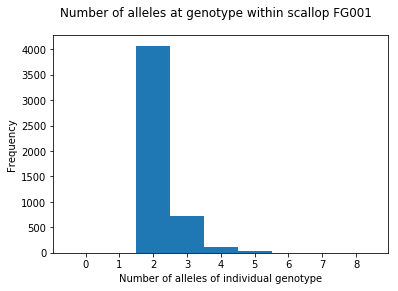

In [10]:
plt.hist(allele_counts, bins=np.arange(10)-0.5)
plt.xticks(range(9))
plt.suptitle("Number of alleles at genotype within scallop FG001")
plt.xlabel("Number of alleles of individual genotype")
plt.ylabel("Frequency")
plt.show()

## Get rank allele frequencies for all genotypes with 2,3,4,5 alleles, respectively

Start with those that just have 3 alleles.

* Get indeces in allele counts with 3, then get same locus names with those indeces out of the unique_locus_names list
* Get allele frequency, which is the column after the haplotype sequence, divided by 100
* Make a list for every tag: first item = locus name, next items are rank decreasing allele frequencies

In [11]:
# get indeces in allele counts that have 3 alleles
three_al_inds = [i for i, x in enumerate(allele_counts) if x == 3]

# check
print three_al_inds[0:9]

[2, 8, 10, 11, 13, 16, 29, 37, 61]


In [12]:
# get tags that match these indeces
names_array = np.array(unique_locus_names)
tags_w_3 = names_array[three_al_inds]

# check
print tags_w_3[0:9]

['18' '54' '61' '64' '69' '87' '129' '164' '288']


In [13]:
list_of_locus_and_afs = []

In [17]:
for index in three_al_inds:
    tag_array = list_arrays_bytag[index]
    tag_list = []
    tagname = tag_array[0,0]
    tag_list.append(tagname)
    af_list = []
    for row in tag_array:
        af = float(row[2])/float(100)
        af_list.append(af)
    af_list = sorted(af_list, reverse = True) # sort in decreasing
    for af in af_list:
        tag_list.append(af)
    list_of_locus_and_afs.append(tag_list)
    
# check
print list_of_locus_and_afs[0:5]

[['18', 0.6470999999999999, 0.34759999999999996, 0.0053], ['54', 0.7347, 0.2551, 0.0102], ['61', 0.7368000000000001, 0.2566, 0.0066], ['64', 0.5213, 0.4692, 0.0095], ['69', 0.5508, 0.4439, 0.0053]]


In [18]:
array_afs = np.array(list_of_locus_and_afs)
tarray_afs = array_afs.transpose()

# check
print tarray_afs[0:4,0:9]

[['18' '54' '61' '64' '69' '87' '129' '164' '288']
 ['0.6471' '0.7347' '0.7368' '0.5213' '0.5508' '0.5537' '0.5351' '0.6452'
  '0.6056']
 ['0.3476' '0.2551' '0.2566' '0.4692' '0.4439' '0.443' '0.4386' '0.3427'
  '0.3833']
 ['0.0053' '0.0102' '0.0066' '0.0095' '0.0053' '0.0034' '0.0263' '0.004'
  '0.0056']]


In [27]:
array_subset = tarray_afs[1:]
array_subset_float = array_subset.astype(np.float)

plotlist = []
for row in array_subset_float:
    sublist = []
    newrow = row.astype(np.float)
    plotlist.append(list(newrow))

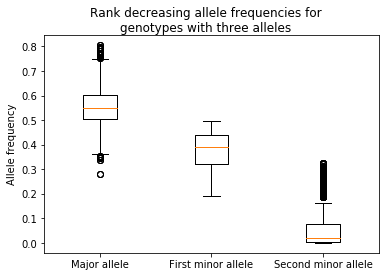

In [29]:
# plot with matplotlib pyplot
plt.boxplot(plotlist) # multiple box plots with list of lists
num_rows = tarray_afs.shape[0]
plt.xticks(range(1,num_rows),['Major allele','First minor allele','Second minor allele']) # label x axis with population names
plt.ylabel('Allele frequency') # axis label
plt.suptitle('Rank decreasing allele frequencies for\ngenotypes with three alleles') # title
plt.show() # show plot

## Now those with 2 alleles

In [31]:
# get indeces in allele counts that have 3 alleles
two_al_inds = [i for i, x in enumerate(allele_counts) if x == 2]

# check
print two_al_inds[0:9]

# get tags that match these indeces
names_array = np.array(unique_locus_names)
tags_w_2 = names_array[two_al_inds]

# check
print tags_w_2[0:9]

# initiate list to store locus names and allele frequencies
list_of_locus_and_afs = []

[0, 1, 3, 4, 5, 6, 7, 9, 12]
['6' '13' '21' '32' '35' '41' '42' '59' '65']


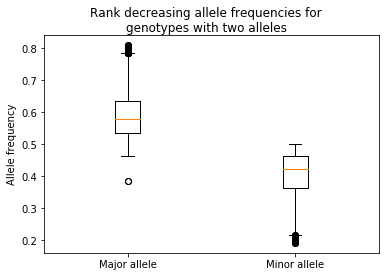

In [34]:
for index in two_al_inds:
    tag_array = list_arrays_bytag[index]
    tag_list = []
    tagname = tag_array[0,0]
    tag_list.append(tagname)
    af_list = []
    for row in tag_array:
        af = float(row[2])/float(100)
        af_list.append(af)
    af_list = sorted(af_list, reverse = True) # sort in decreasing
    for af in af_list:
        tag_list.append(af)
    list_of_locus_and_afs.append(tag_list)

array_afs = np.array(list_of_locus_and_afs)
tarray_afs = array_afs.transpose()

array_subset = tarray_afs[1:]
array_subset_float = array_subset.astype(np.float)

plotlist = []
for row in array_subset_float:
    sublist = []
    newrow = row.astype(np.float)
    plotlist.append(list(newrow))
# plot with matplotlib pyplot
plt.boxplot(plotlist) # multiple box plots with list of lists
num_rows = tarray_afs.shape[0]
plt.xticks(range(1,num_rows),['Major allele','Minor allele'])
plt.ylabel('Allele frequency') # axis label
plt.suptitle('Rank decreasing allele frequencies for\ngenotypes with two alleles') # title
plt.show() # show plot

## Now with 4 alleles

In [36]:
# get indeces in allele counts that have 3 alleles
four_al_inds = [i for i, x in enumerate(allele_counts) if x == 4]

# check
print four_al_inds[0:9]

# get tags that match these indeces
names_array = np.array(unique_locus_names)
tags_w_4 = names_array[four_al_inds]

# check
print tags_w_4[0:9]

# initiate list to store locus names and allele frequencies
list_of_locus_and_afs = []

[151, 228, 286, 346, 404, 551, 556, 663, 945]
['609' '916' '1196' '1453' '1719' '2365' '2383' '2830' '4008']


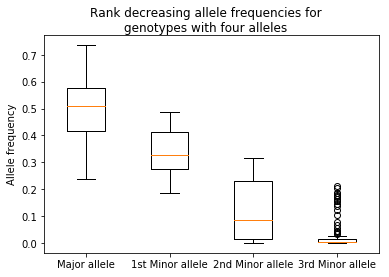

In [37]:
for index in four_al_inds:
    tag_array = list_arrays_bytag[index]
    tag_list = []
    tagname = tag_array[0,0]
    tag_list.append(tagname)
    af_list = []
    for row in tag_array:
        af = float(row[2])/float(100)
        af_list.append(af)
    af_list = sorted(af_list, reverse = True) # sort in decreasing
    for af in af_list:
        tag_list.append(af)
    list_of_locus_and_afs.append(tag_list)

array_afs = np.array(list_of_locus_and_afs)
tarray_afs = array_afs.transpose()

array_subset = tarray_afs[1:]
array_subset_float = array_subset.astype(np.float)

plotlist = []
for row in array_subset_float:
    sublist = []
    newrow = row.astype(np.float)
    plotlist.append(list(newrow))
# plot with matplotlib pyplot
plt.boxplot(plotlist) # multiple box plots with list of lists
num_rows = tarray_afs.shape[0]
plt.xticks(range(1,num_rows),['Major allele','1st Minor allele','2nd Minor allele', '3rd Minor allele'])
plt.ylabel('Allele frequency') # axis label
plt.suptitle('Rank decreasing allele frequencies for\ngenotypes with four alleles') # title
plt.show() # show plot

## Now with 5 alleles

In [38]:
# get indeces in allele counts that have 3 alleles
five_al_inds = [i for i, x in enumerate(allele_counts) if x == 5]

# check
print five_al_inds[0:9]

# get tags that match these indeces
names_array = np.array(unique_locus_names)
tags_w_5 = names_array[five_al_inds]

# check
print tags_w_5[0:9]

# initiate list to store locus names and allele frequencies
list_of_locus_and_afs = []

[1383, 1620, 1690, 2023, 2510, 2513, 2747, 3030, 3035]
['5686' '6478' '6705' '7932' '9549' '9556' '10283' '11131' '11151']


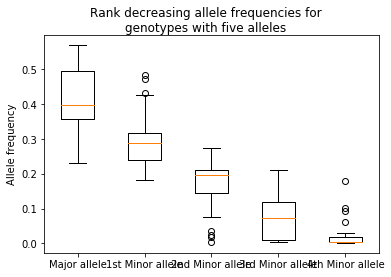

In [39]:
for index in five_al_inds:
    tag_array = list_arrays_bytag[index]
    tag_list = []
    tagname = tag_array[0,0]
    tag_list.append(tagname)
    af_list = []
    for row in tag_array:
        af = float(row[2])/float(100)
        af_list.append(af)
    af_list = sorted(af_list, reverse = True) # sort in decreasing
    for af in af_list:
        tag_list.append(af)
    list_of_locus_and_afs.append(tag_list)

array_afs = np.array(list_of_locus_and_afs)
tarray_afs = array_afs.transpose()

array_subset = tarray_afs[1:]
array_subset_float = array_subset.astype(np.float)

plotlist = []
for row in array_subset_float:
    sublist = []
    newrow = row.astype(np.float)
    plotlist.append(list(newrow))
# plot with matplotlib pyplot
plt.boxplot(plotlist) # multiple box plots with list of lists
num_rows = tarray_afs.shape[0]
plt.xticks(range(1,num_rows),['Major allele','1st Minor allele','2nd Minor allele', '3rd Minor allele','4th Minor allele'])
plt.ylabel('Allele frequency') # axis label
plt.suptitle('Rank decreasing allele frequencies for\ngenotypes with five alleles') # title
plt.show() # show plot